In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#input files, recombination rate over 1kb windows
csec_file = "concat_Csec_geq1000_rmind_hardfilt_exhet_biall_dp_qfilt_mac2_maxmiss06_rmfilt_sedmiss_phimp.vcf_LDhat_bpen1_statres.txt_w1kb"
mbel_file = "concat_Mbel_excl5scaff_rmind_hardfilt_exhet_biall_dp_qfilt_mac2_maxmiss06_rmfilt_sedmiss_phimp.vcf_LDhat_bpen1_statres_100N.txt_w1kb"

# _C. secundus_

In [4]:
Csec_1kb = pd.read_csv(csec_file, sep="\t")
Csec_1kb = Csec_1kb.reset_index()
Csec_scaff = Csec_1kb.groupby("Scaffold")

In [5]:
all_vals = []
for scaff, data in Csec_scaff:
    if data.shape[0]>1000:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(1000)/1000, mode='same')
        all_vals= all_vals+list(sliding_mean)
av_arr = np.array(all_vals)

In [6]:
# 1 percentile
np.quantile(av_arr, 0.01)

0.0008344799011811001

In [8]:
(av_arr<np.quantile(av_arr, 0.01)).sum()

5704

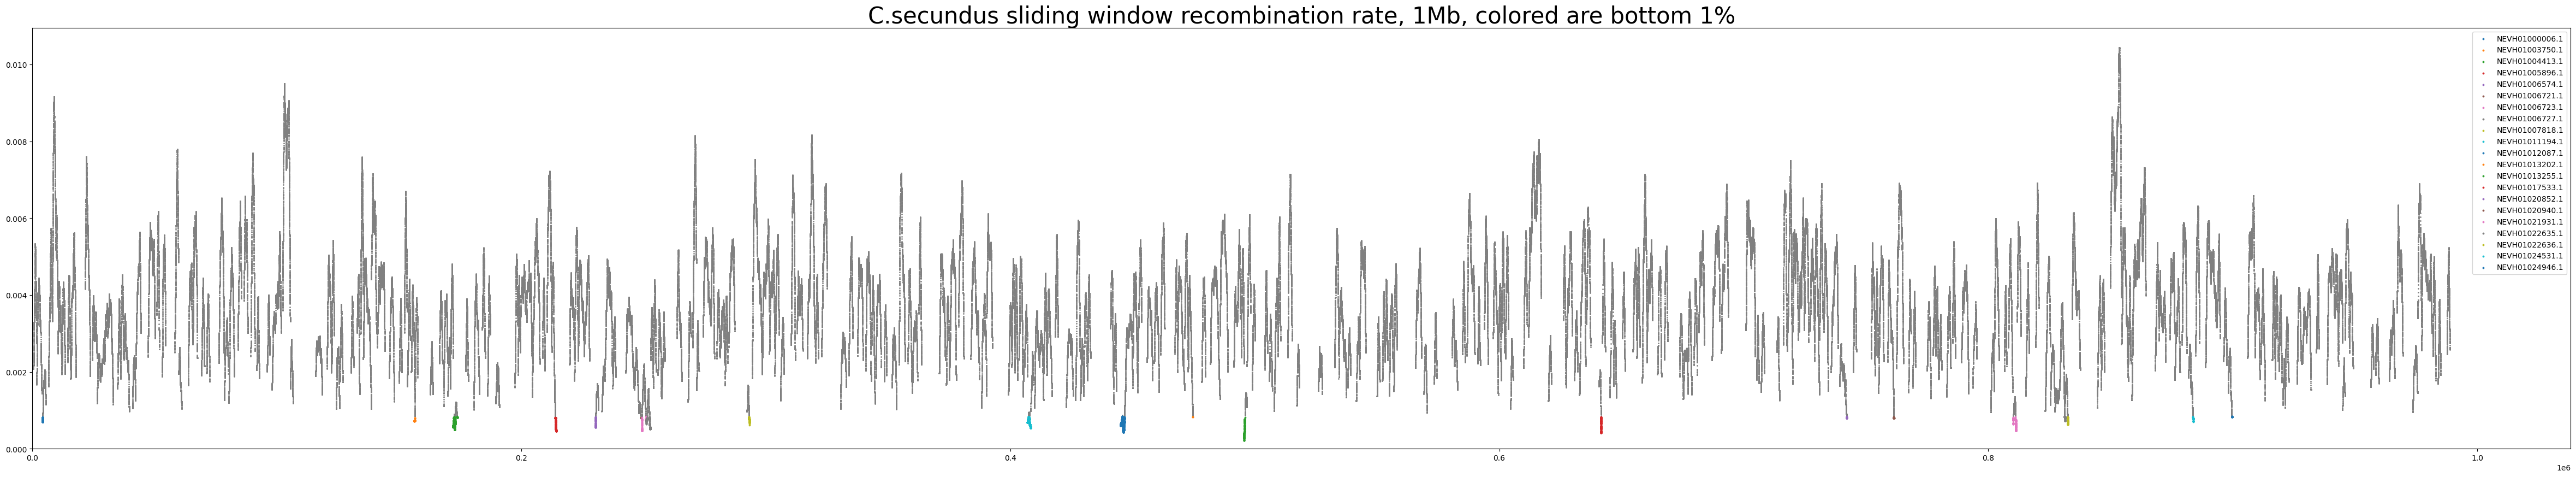

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(60,10))
for scaff, data in Csec_scaff:
    if data.shape[0]>1000:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(1000)/1000, mode='same')
        data['sliding'] = sliding_mean
        ax.scatter(data.index, data.sliding, color='grey', s=1)
        data_below2sigma = data.loc[data.sliding<0.0008344799011811001]
        if data_below2sigma.shape[0]>0:
            ax.scatter(data_below2sigma.index, data_below2sigma.sliding, s=3, label=list(set(data_below2sigma.Scaffold))[0])
ax.legend()
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title('C.secundus sliding window recombination rate, 1Mb, colored are bottom 1%', size=30)
plt.show()

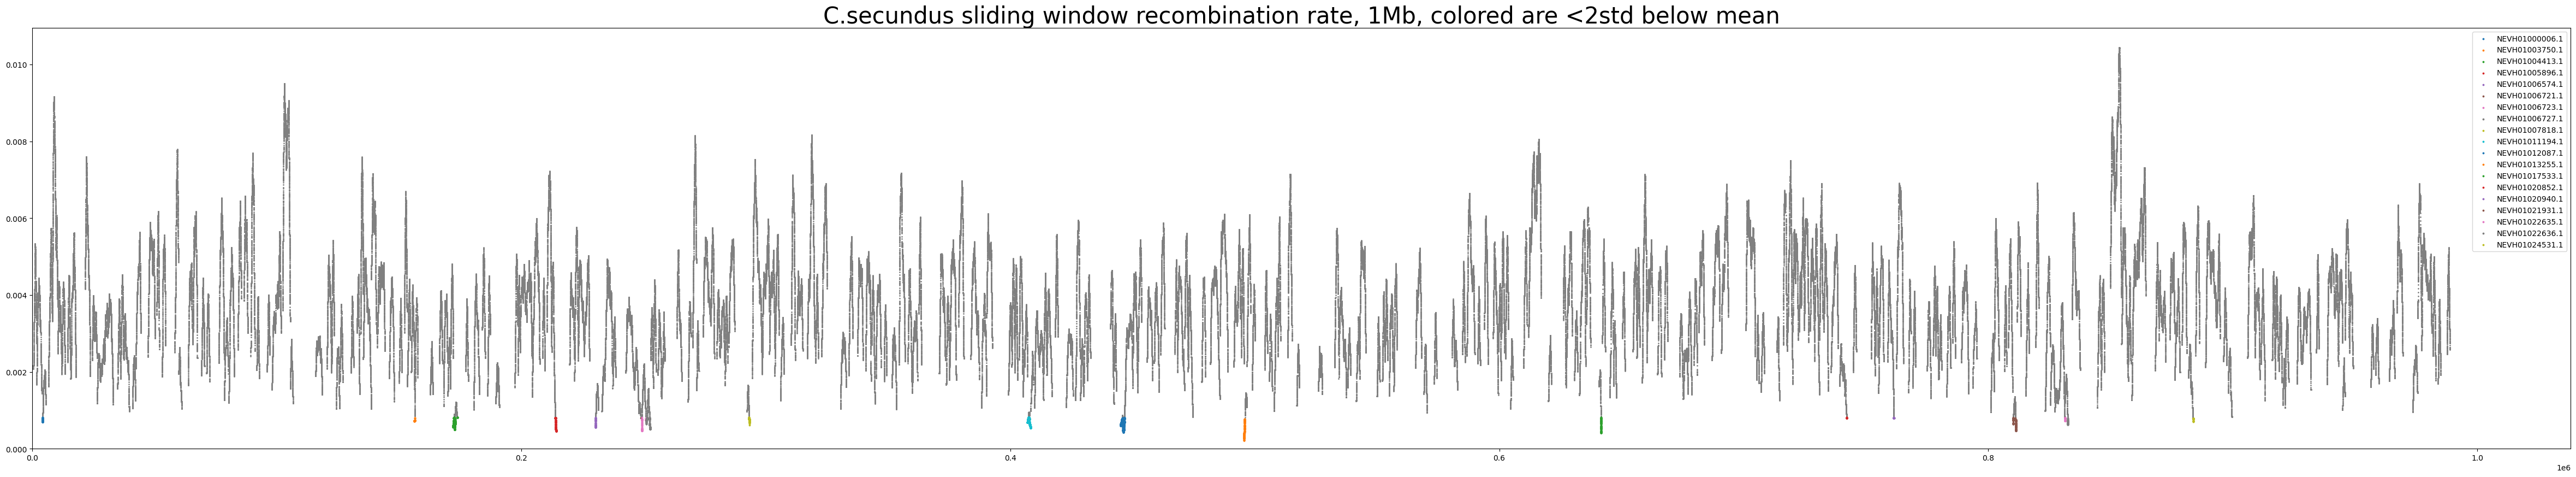

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(60,10))
for scaff, data in Csec_scaff:
    if data.shape[0]>1000:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(1000)/1000, mode='same')
        data['sliding'] = sliding_mean
        ax.scatter(data.index, data.sliding, color='grey', s=1)
        data_below2sigma = data.loc[data.sliding<0.0008110888495544608]
        if data_below2sigma.shape[0]>0:
            ax.scatter(data_below2sigma.index, data_below2sigma.sliding, s=3, label=list(set(data_below2sigma.Scaffold))[0])
ax.legend()
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title('C.secundus sliding window recombination rate, 1Mb, colored are <2std below mean', size=30)
plt.show()

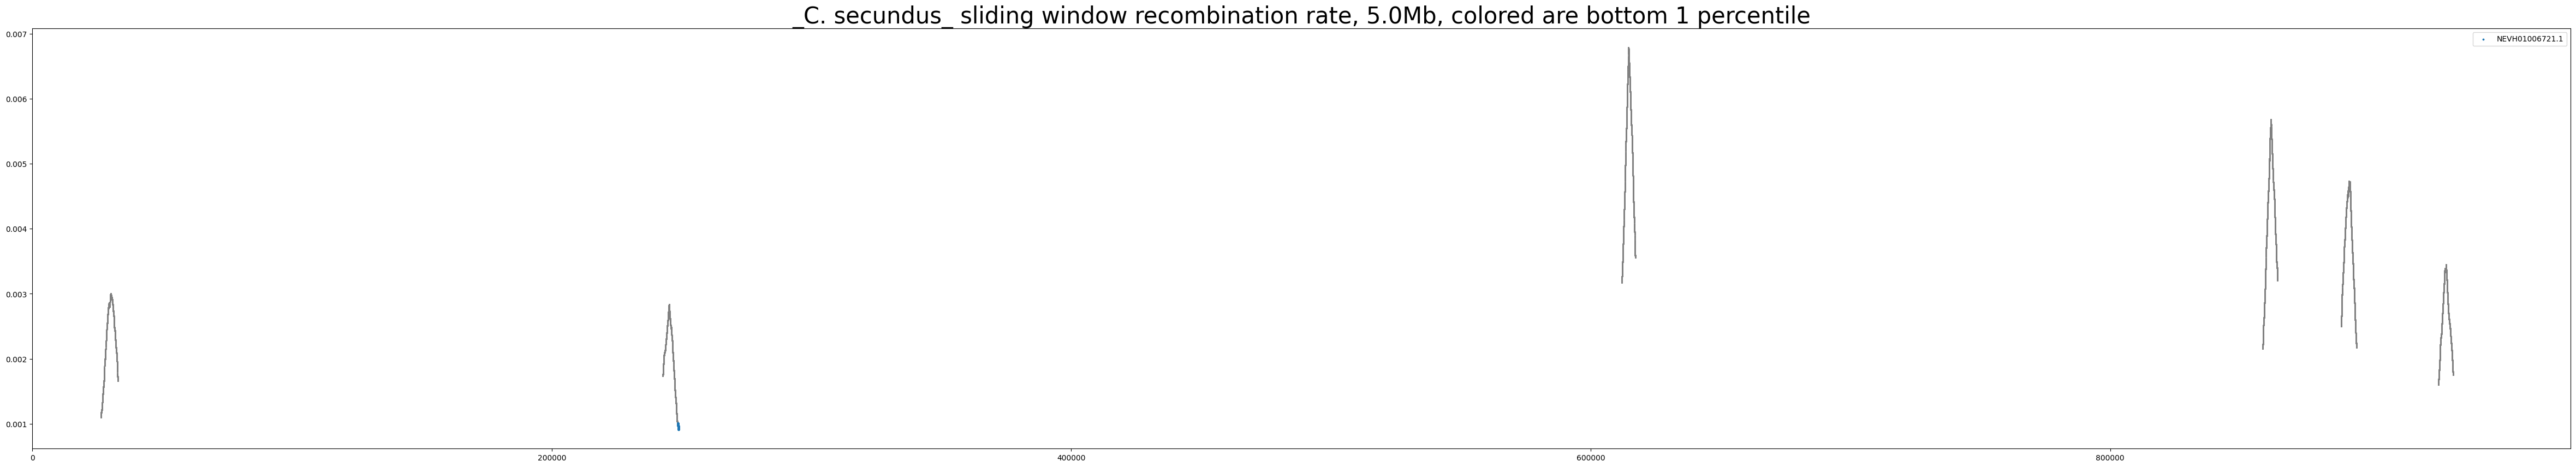

In [107]:
winsize = 5000
minscaffsize= 5000
quantile = 0.01

all_vals = []
for scaff, data in Csec_scaff:
    if data.shape[0]>minscaffsize:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(winsize)/winsize, mode='same')
        all_vals= all_vals+list(sliding_mean)
av_arr = np.array(all_vals)
oneperc = np.quantile(av_arr, quantile)


regions = []
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(60,10))
for scaff, data in Csec_scaff:
    if data.shape[0]>minscaffsize:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(winsize)/winsize, mode='same')
        data['sliding'] = sliding_mean
        ax.scatter(data.index, data.sliding, color='grey', s=1)
        data_below2sigma = data.loc[data.sliding<oneperc]
        if data_below2sigma.shape[0]>0:
            ax.scatter(data_below2sigma.index, data_below2sigma.sliding, s=3, label=list(set(data_below2sigma.Scaffold))[0], zorder=300)
            regions.append(data_below2sigma)
ax.legend()
#ax.axvspan(115702, 127325, color='blue', alpha=0.1, zorder=300)

ax.set_xlim(0,)
#ax.set_ylim(0,0.01)
ax.set_title('_C. secundus_ sliding window recombination rate, {winsize}Mb, colored are bottom 1 percentile'.format(winsize=(winsize/1000)), size=30)
plt.show()

regdf = pd.concat(regions)
regdf.to_csv('20230808_Csec_lowRho_regions_{winsize}Mbslide.tsv'.format(winsize=(winsize/1000)), sep='\t')


In [106]:
regions[0]

,index,Scaffold,Wind_start,Wind_end,Mean_rho,sliding
4141,4141,NEVH01000006.1,0,1000.0,0.000788,0.000701
4142,4142,NEVH01000006.1,1000,2000.0,0.001200,0.000701
4143,4143,NEVH01000006.1,2000,3000.0,0.001409,0.000701
4144,4144,NEVH01000006.1,3000,4000.0,0.001597,0.000701
4145,4145,NEVH01000006.1,4000,5000.0,0.001597,0.000701
...,...,...,...,...,...,...
4259,4259,NEVH01000006.1,118000,119000.0,0.000013,0.000816
4260,4260,NEVH01000006.1,119000,120000.0,0.002942,0.000816
4261,4261,NEVH01000006.1,120000,121000.0,0.000057,0.000816
4262,4262,NEVH01000006.1,121000,122000.0,0.009026,0.000816


# _M. bellicosus_

In [11]:
Mbel_1kb = pd.read_csv(mbel_file, sep="\t", header=None)

Mbel_1kb = Mbel_1kb.reset_index()
Mbel_1kb.columns = ['index', 'Scaffold', 'Wind_start', 'Wind_end', 'Mean_rho']
Mbel_scaff = Mbel_1kb.groupby("Scaffold")

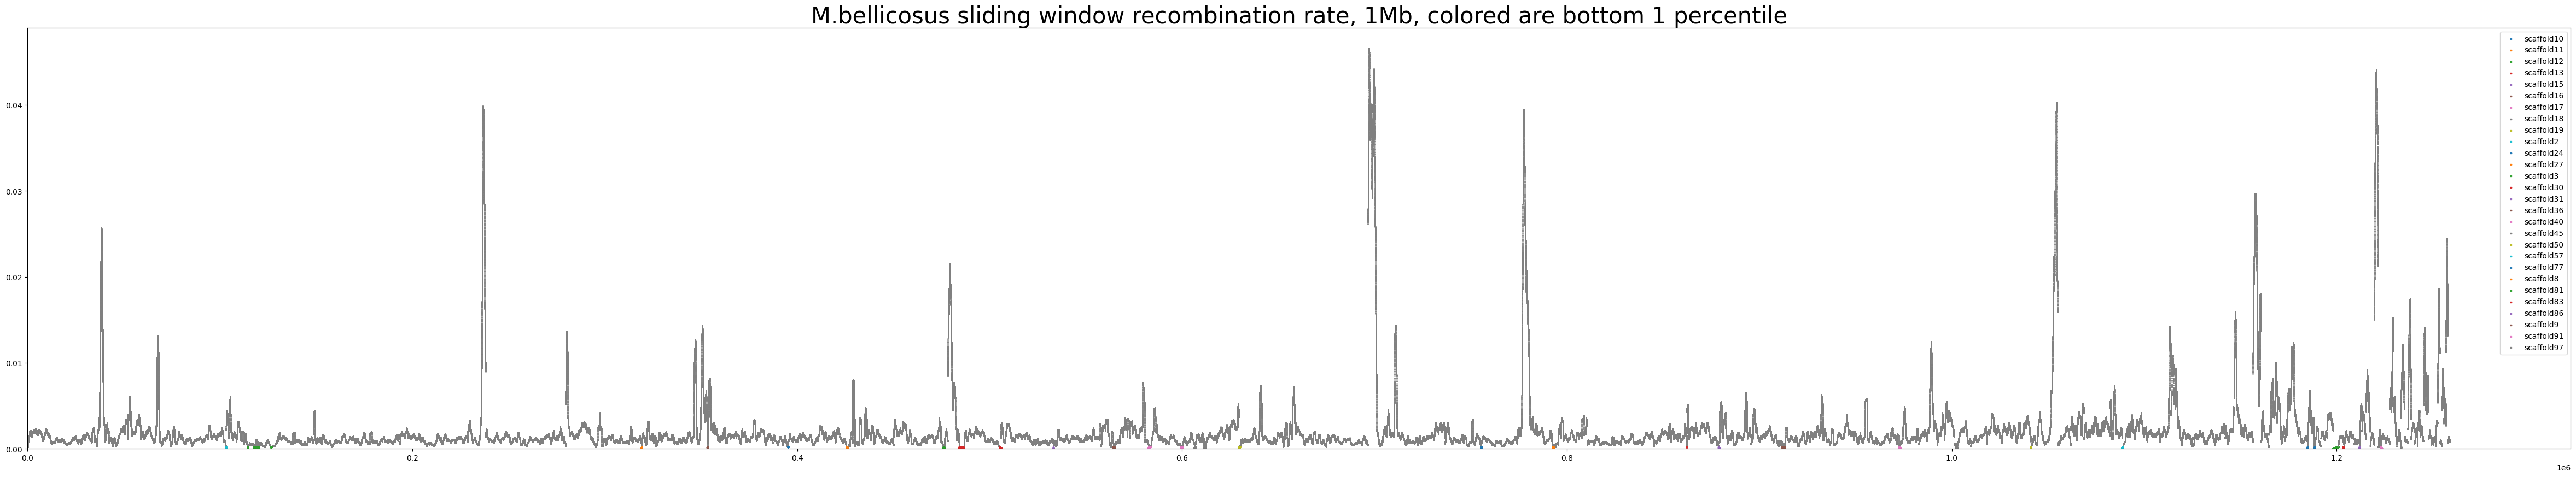

In [19]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(60,10))
for scaff, data in Mbel_scaff:
    if data.shape[0]>1000:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(1000)/1000, mode='same')
        data['sliding'] = sliding_mean
        ax.scatter(data.index, data.sliding, color='grey', s=1)
        data_below2sigma = data.loc[data.sliding<0.00018746420023859993]
        if data_below2sigma.shape[0]>0:
            ax.scatter(data_below2sigma.index, data_below2sigma.sliding, s=3, label=list(set(data_below2sigma.Scaffold))[0])
ax.legend()
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title('M.bellicosus sliding window recombination rate, 1Mb, colored are bottom 1 percentile', size=30)
plt.show()

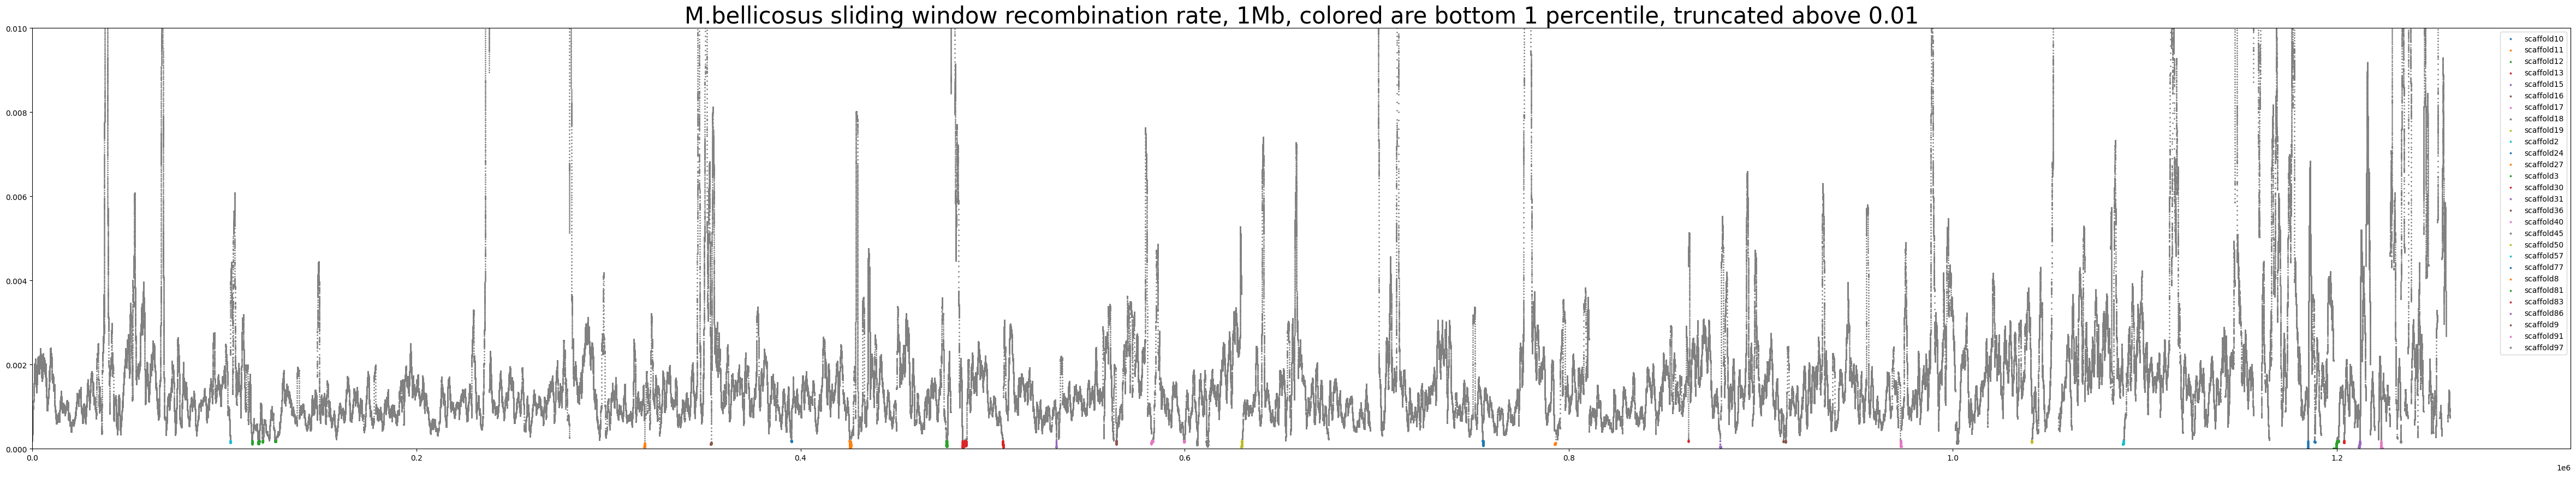

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(60,10))
for scaff, data in Mbel_scaff:
    if data.shape[0]>1000:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(1000)/1000, mode='same')
        data['sliding'] = sliding_mean
        ax.scatter(data.index, data.sliding, color='grey', s=1)
        data_below2sigma = data.loc[data.sliding<0.00018746420023859993]
        if data_below2sigma.shape[0]>0:
            ax.scatter(data_below2sigma.index, data_below2sigma.sliding, s=3, label=list(set(data_below2sigma.Scaffold))[0])
ax.legend()
ax.set_xlim(0,)
ax.set_ylim(0,0.01)
ax.set_title('M.bellicosus sliding window recombination rate, 1Mb, colored are bottom 1 percentile, truncated above 0.01', size=30)
plt.show()

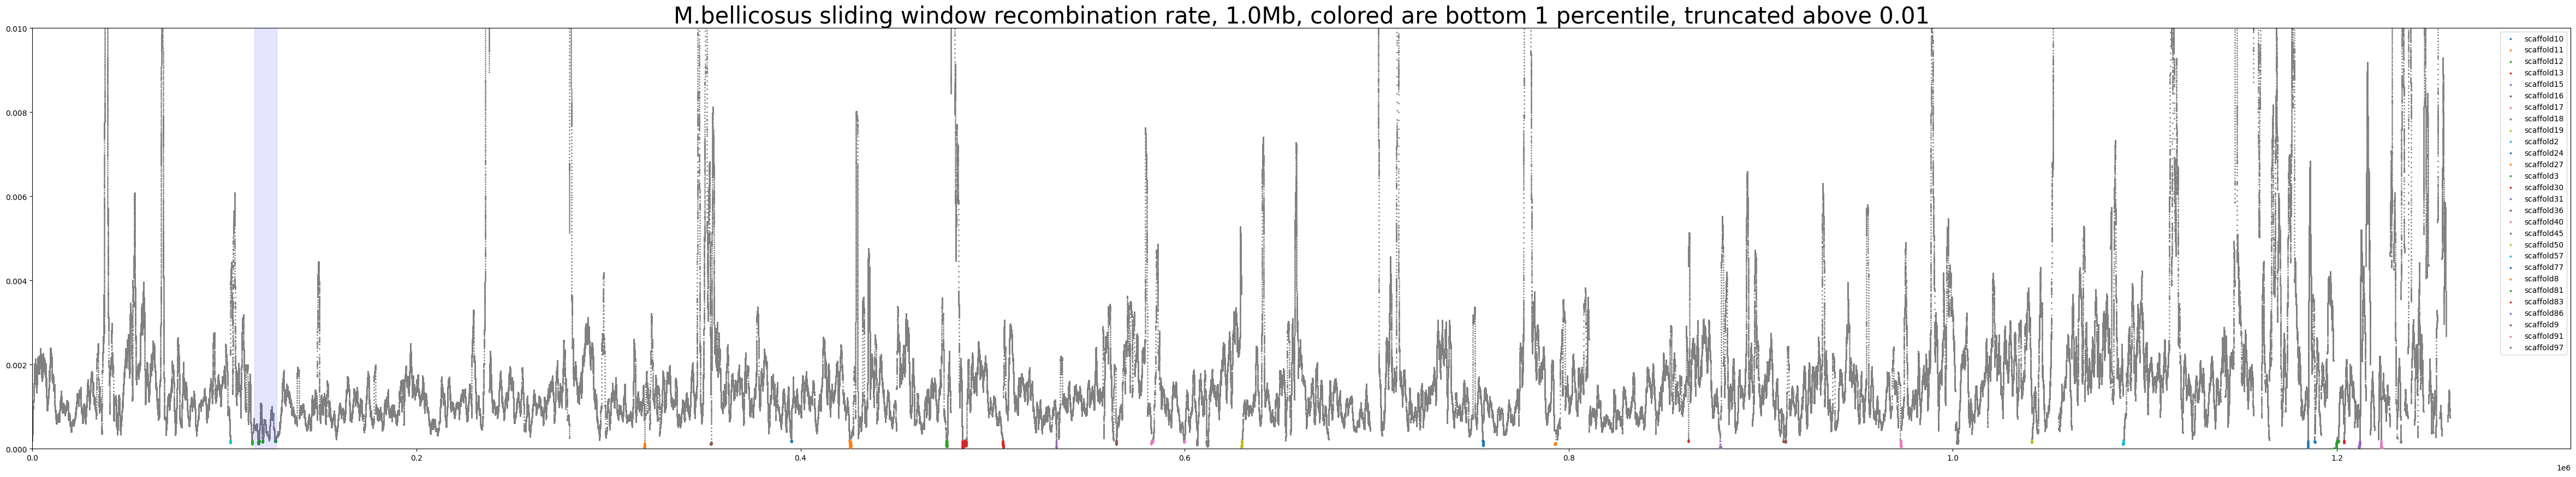

In [104]:
winsize = 1000
minscaffsize= 1000
quantile = 0.01

all_vals = []
for scaff, data in Mbel_scaff:
    if data.shape[0]>minscaffsize:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(winsize)/winsize, mode='same')
        all_vals= all_vals+list(sliding_mean)
av_arr = np.array(all_vals)
oneperc = np.quantile(av_arr, quantile)


regions = []
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(60,10))
for scaff, data in Mbel_scaff:
    if data.shape[0]>minscaffsize:
        sliding_mean = np.convolve(data.Mean_rho, np.ones(winsize)/winsize, mode='same')
        data['sliding'] = sliding_mean
        ax.scatter(data.index, data.sliding, color='grey', s=1)
        data_below2sigma = data.loc[data.sliding<oneperc]
        if data_below2sigma.shape[0]>0:
            ax.scatter(data_below2sigma.index, data_below2sigma.sliding, s=3, label=list(set(data_below2sigma.Scaffold))[0], zorder=300)
            regions.append(data_below2sigma)
ax.legend()
ax.axvspan(115702, 127325, color='blue', alpha=0.1, zorder=300)

ax.set_xlim(0,)
ax.set_ylim(0,0.01)
ax.set_title('M.bellicosus sliding window recombination rate, {winsize}Mb, colored are bottom 1 percentile, truncated above 0.01'.format(winsize=(winsize/1000)), size=30)
plt.show()

regdf = pd.concat(regions)
regdf.to_csv('20230808_Mbel_lowRho_regions_{winsize}Mbslide.tsv'.format(winsize=(winsize/1000)), sep='\t')


In [101]:
regdf = pd.concat(regions)

In [64]:
sca3 = Mbel_scaff.get_group('scaffold3')
sliding_mean = np.convolve(sca3.Mean_rho, np.ones(winsize)/winsize, mode='same')
sca3['sliding'] = sliding_mean

/scratch/ipykernel_20180/3354743738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sca3['sliding'] = sliding_mean


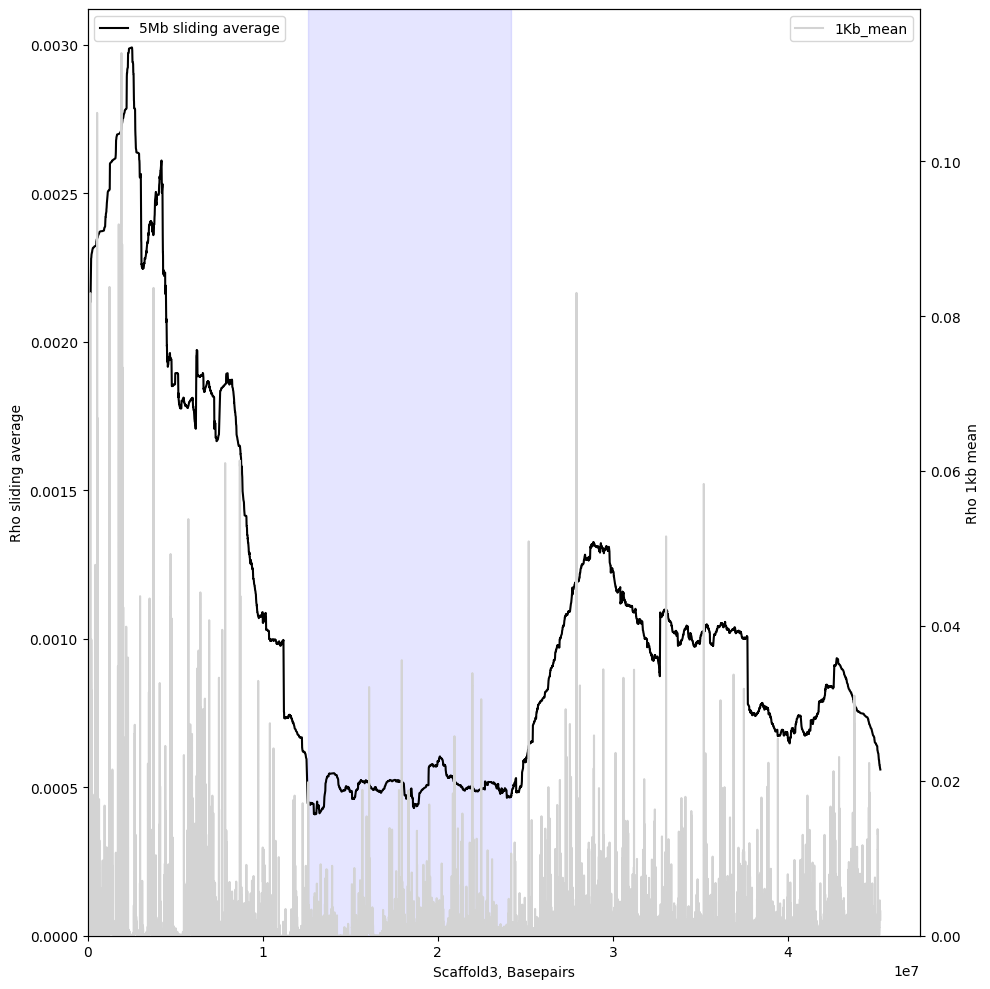

In [99]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.plot(sca3.Wind_start, sca3.sliding, c='black', label='5Mb sliding average', zorder=10000)

ax2 = ax.twinx()
ax2.plot(sca3.Wind_start, sca3.Mean_rho, c='lightgrey', label='1Kb_mean', zorder=-200)

ax.axvspan(12564000,24188000, zorder= -300, alpha=0.1, color='blue')
ax.set_xlabel('Scaffold3, Basepairs')
ax.set_ylabel('Rho sliding average')

ax2.set_ylabel('Rho 1kb mean')

ax.legend(loc='upper left')
ax2.legend()

ax.set_ylim(0,)
ax.set_xlim(0,)
ax2.set_ylim(0,)

plt.tight_layout()
plt.show()

In [102]:
regdf.to_csv('20230808_Mbel_lowRho_regions_5Mbslide.tsv', sep='\t')

In [109]:
Mbraker = pd.read_csv('./Mbel/20230714_Mbel_gene_start_stop.tsv', sep='\t')

In [24]:
Mbraker

,gene_id,Start_pos,End_pos,scaffold
0,g1.t1,8186,44541,scaffold28
1,g10.t1,394418,423981,scaffold28
2,g100.t1,5674789,5679333,scaffold28
3,g1000.t1,77297,83141,scaffold149
4,g10000.t1,5199390,5200347,scaffold13
...,...,...,...,...
30620,g9995.t1,4977567,4981264,scaffold13
30621,g9996.t1,5069480,5071376,scaffold13
30622,g9997.t1,5086334,5106225,scaffold13
30623,g9998.t1,5123617,5126479,scaffold13


In [110]:
Mbraker_scaff3lowrho_ss = Mbraker.loc[Mbraker.scaffold =='scaffold3'].loc[Mbraker.Start_pos>12564000.0].loc[Mbraker.End_pos<24188000.0]

In [26]:
Mbraker_scaff3lowrho_ss.to_csv('./Mbel_scaffold3_13Mbto24Mb_all_genes.tsv', sep='\t')

In [116]:
Mbraker_scaff3lowrho_ss

,gene_id,Start_pos,End_pos,scaffold
12005,g18348.t1,12683111,12685024,scaffold3
12006,g18349.t1,12708923,12718126,scaffold3
12009,g18350.t1,12746224,12747091,scaffold3
12010,g18351.t1,12794651,12795021,scaffold3
12011,g18352.t1,12858767,12859452,scaffold3
...,...,...,...,...
12223,g18499.t1,22248830,22253441,scaffold3
12226,g18500.t1,22831797,22839997,scaffold3
12227,g18501.t1,23243501,23244644,scaffold3
12228,g18502.t1,23846075,23847160,scaffold3


In [111]:
DEdf = pd.read_csv('./Mbel/20230727_DE_table_with_orthologues_from_elsner2017.tsv', sep='\t')

In [112]:
sc3lr_DE = Mbraker_scaff3lowrho_ss.merge(DEdf, left_on='gene_id', right_on='orthologues', how='left')

In [ ]:
sc3lr_DE.loc[sc3lr_DE.sgo==True].to_csv('./Mbel_scaffold3_13Mbto24Mb_sgo_DE.tsv', sep='\t')

In [115]:
sc3lr_DE.loc[sc3lr_DE.sgo==True].sum()

gene_id                                   g18353.t1g18354.t1g18358.t1g18389.t1g18392.t1g...
Start_pos                                                                         783629911
End_pos                                                                           785009305
scaffold                                  scaffold3scaffold3scaffold3scaffold3scaffold3s...
Unnamed: 0                                                                         449108.0
GeneID                                    Mnat_07111Mnat_07110Mnat_07109Mnat_03222Mnat_0...
DE                                                                                       36
DE_royal                                                                                 36
sgo                                                                                      45
sgo_mbel                                                                                 45
sgo_mnat                                                                        

In [54]:
24188000.0-12564000.0

11624000.0

In [ ]:
11624000.0/1000000